## Assignment 4 - Customer Segmentation Analysis

### Sparsh Kumar Sharoff - 2019115101

### 1. Download the Dataset

### 2. Load the dataset into the tool

In [2]:
import pandas as pd
df = pd.read_csv("./Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### 3. Perform Visualizations

### Univariate Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

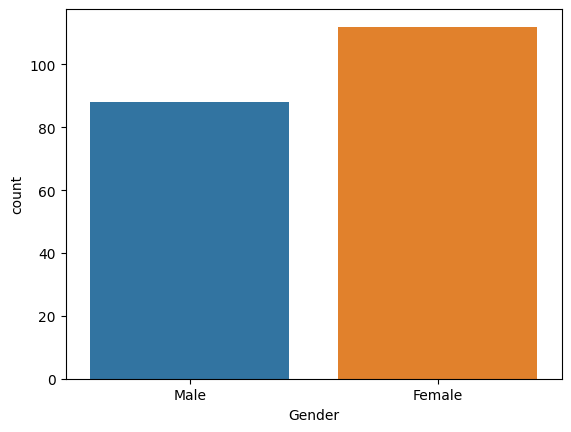

In [9]:
sns.countplot(df['Gender'])
plt.show()

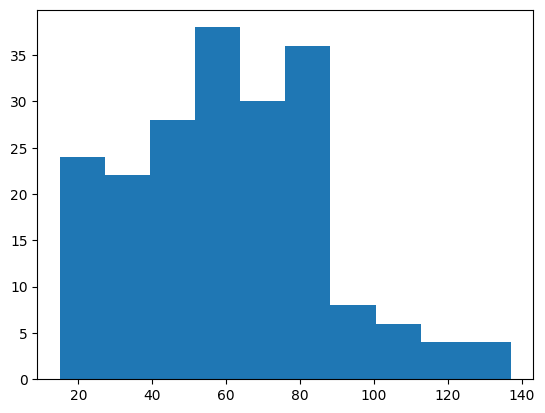

In [10]:
plt.hist(df['Annual Income (k$)'])
plt.show()

### Bi-Variate Analysis

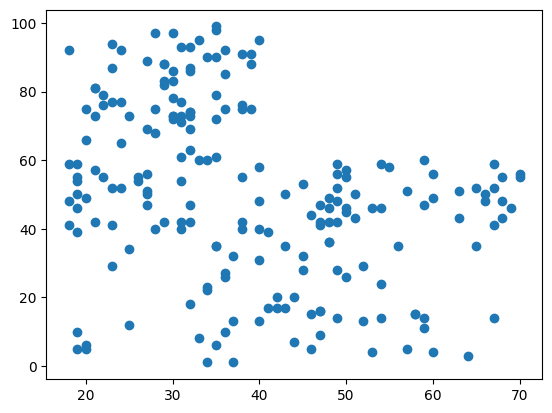

In [12]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.show()

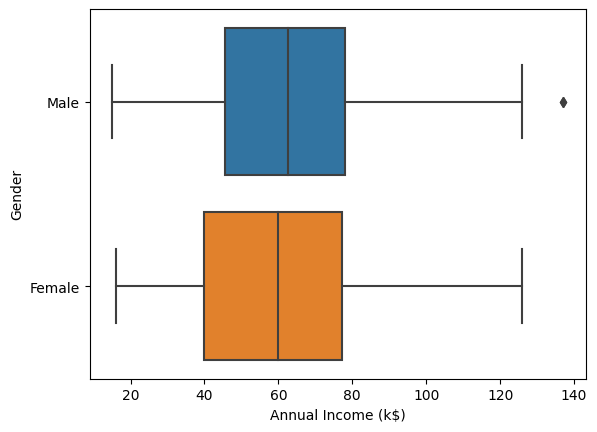

In [15]:
sns.boxplot(x = df['Annual Income (k$)'], y = df['Gender'])
plt.show()

### Multi-Variate Analysis

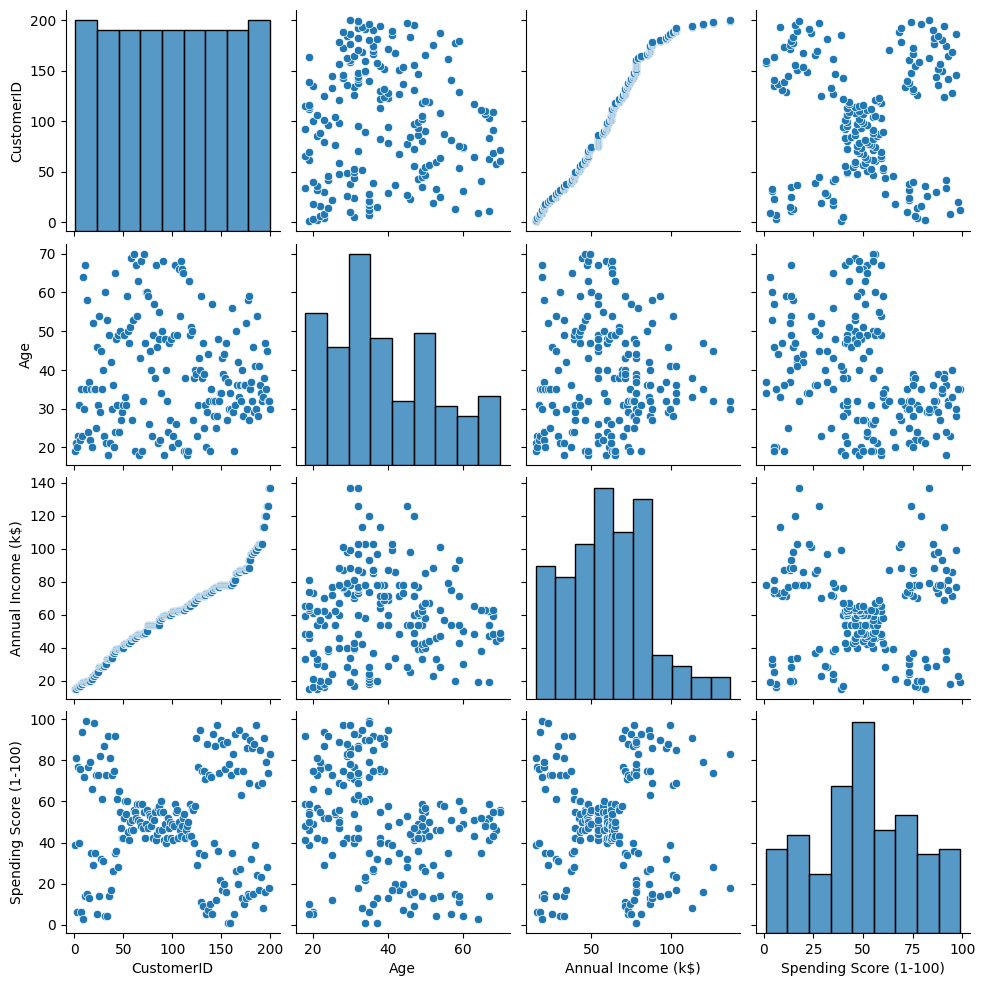

In [16]:
sns.pairplot(df, kind = "scatter")
plt.show()

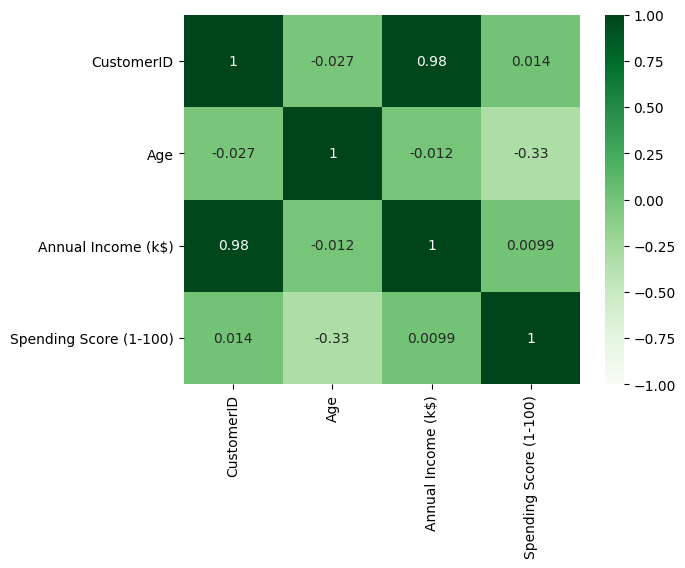

In [19]:
sns.heatmap(df.corr(), vmin = -1, center = 0, annot = True, cmap = 'Greens')
plt.show()

### 4. Perform descriptive statistics on the dataset

In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 5. Check for Missing Values and deal with them

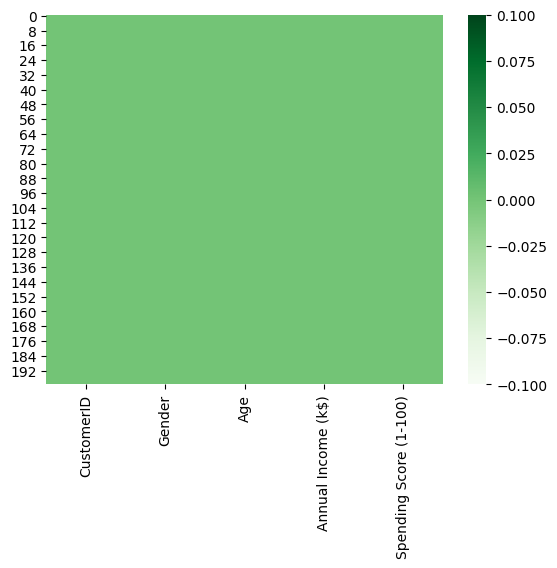

In [23]:
sns.heatmap(df.isnull(),cmap="Greens")
plt.show()

In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Find the outliers and replace the outliers

In [26]:
lst = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [27]:
df[lst].quantile(q = (0.25,0.75))

,Age,Annual Income (k$),Spending Score (1-100)
0.25,28.75,41.5,34.75
0.75,49.00,78.0,73.00


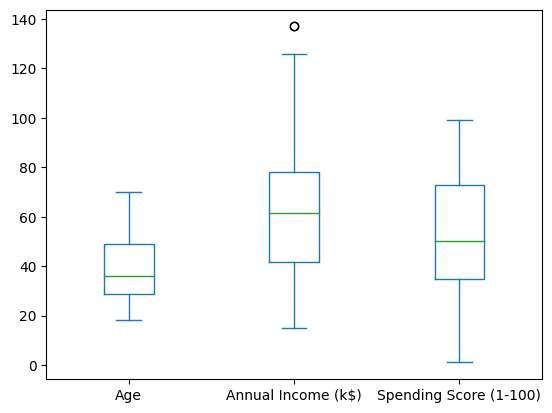

In [28]:
df[lst].plot(kind="box")
plt.show()

In [30]:
import numpy as np
print('MEAN:')
for x in lst:
    print(x, ':', np.mean(df[x]))

MEAN:
Age : 38.85
Annual Income (k$) : 60.56
Spending Score (1-100) : 50.2


In [36]:
for x in lst:
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df[x] = np.where(df[x] > upper, upper, df[x])
    df[x] = np.where(df[x] < lower, lower, df[x])

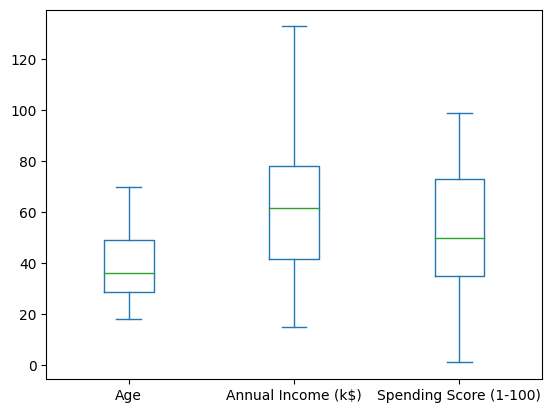

In [37]:
df[lst].plot(kind = "box")
plt.show()

### 7. Check for Categorical columns and perform encoding


In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15.00,39.0
1,2,1,21.0,15.00,81.0
2,3,0,20.0,16.00,6.0
3,4,0,23.0,16.00,77.0
4,5,0,31.0,17.00,40.0
...,...,...,...,...,...
195,196,0,35.0,120.00,79.0
196,197,0,45.0,126.00,28.0
197,198,1,32.0,126.00,74.0
198,199,1,32.0,132.75,18.0


### 8. Scaling the data

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [99]:
df_scaled

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.74542941, -0.43480148,
         1.50779305],
       [-1.70609137,  1.12815215, -1.28103541, -1.74542941,  1.19570407,
         1.50779305],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70708307, -1.71591298,
         0.45706618],
       ...,
       [ 1.68877065,  1.12815215, -0.49160182,  2.51101403,  0.92395314,
        -0.59366068],
       [ 1.70609137,  1.12815215, -0.49160182,  2.76985181, -1.25005425,
        -1.64438754],
       [ 1.7234121 ,  1.12815215, -0.6351352 ,  2.76985181,  1.27334719,
        -0.59366068]])

### 9. Perform any of the clustering algorithms

In [100]:
from sklearn.cluster import KMeans

In [101]:
df_clust = df

In [102]:
import matplotlib.pyplot as plt

TWSS = []
k = list(range(2,11))

for i in k:
    km = KMeans(n_clusters = i,init = 'k-means++',n_init = 10, max_iter = 100, random_state = 100)
    km.fit(df_clust)
    TWSS.append(km.inertia_)

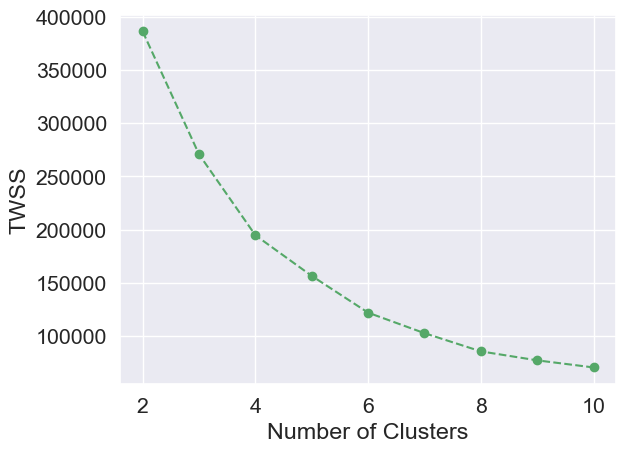

In [103]:
plt.plot(k,TWSS,'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('TWSS')
plt.show()

In [104]:
km = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 500, tol = 1e-05, random_state = 100)

### 10. Add the cluster data with the primary dataset

In [105]:
df['Cluster'] = km.fit_predict(df_clust)

In [106]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19.0,15.00,39.0,3
1,2,1,21.0,15.00,81.0,3
2,3,0,20.0,16.00,6.0,3
3,4,0,23.0,16.00,77.0,3
4,5,0,31.0,17.00,40.0,3
...,...,...,...,...,...,...
195,196,0,35.0,120.00,79.0,1
196,197,0,45.0,126.00,28.0,0
197,198,1,32.0,126.00,74.0,1
198,199,1,32.0,132.75,18.0,0


In [107]:
df['Cluster'].value_counts()

2    66
3    59
1    39
0    36
Name: Cluster, dtype: int64

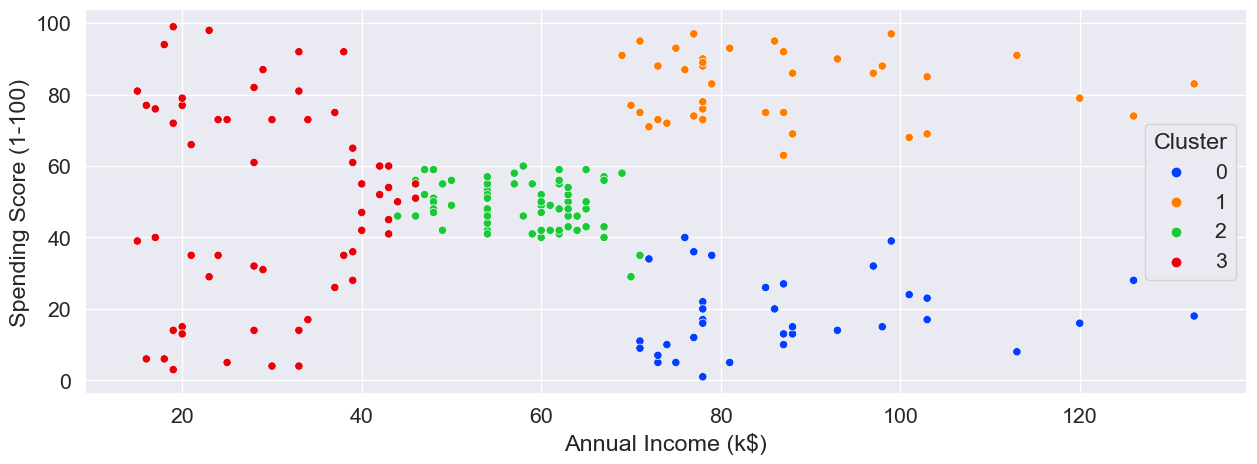

In [108]:
fig,ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Cluster'], palette = 'bright')
plt.show()

In [109]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(df,  km.labels_,  metric = 'euclidean')
score

0.4230364651538167

### 11. Split the data into dependent and independent variables.


##### Dependent Variable

In [110]:
y = df['Cluster']
y

0      3
1      3
2      3
3      3
4      3
      ..
195    1
196    0
197    1
198    0
199    1
Name: Cluster, Length: 200, dtype: int32

#### Independent Variable

In [111]:
x = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.00,39.0
1,1,21.0,15.00,81.0
2,0,20.0,16.00,6.0
3,0,23.0,16.00,77.0
4,0,31.0,17.00,40.0
...,...,...,...,...
195,0,35.0,120.00,79.0
196,0,45.0,126.00,28.0
197,1,32.0,126.00,74.0
198,1,32.0,132.75,18.0


### 12. Split the data into training and testing

In [112]:
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [153]:
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
162,1,19.0,81.0,5.0
45,0,24.0,39.0,65.0
179,1,35.0,93.0,90.0
37,0,30.0,34.0,73.0
120,1,27.0,67.0,56.0
...,...,...,...,...
98,1,48.0,61.0,42.0
129,1,38.0,71.0,75.0
41,1,24.0,38.0,92.0
114,0,18.0,65.0,48.0


In [154]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
176,1,58.0,88.00,15.0
63,0,54.0,47.00,59.0
137,1,32.0,73.00,73.0
160,0,56.0,79.00,35.0
64,1,63.0,48.00,51.0
107,1,54.0,63.00,46.0
153,0,38.0,78.00,76.0
29,0,23.0,29.00,87.0
186,0,54.0,101.00,24.0
88,0,34.0,58.00,60.0


In [155]:
y_train

162    0
45     3
179    1
37     3
120    2
      ..
98     2
129    1
41     3
114    2
47     3
Name: Cluster, Length: 140, dtype: int32

In [156]:
y_test

176    0
63     2
137    1
160    0
64     2
107    2
153    1
29     3
186    0
88     2
21     3
155    1
123    1
126    2
42     3
113    2
49     3
5      3
199    1
33     3
99     2
150    0
169    1
34     3
116    2
189    1
181    1
89     2
18     3
73     2
175    1
191    1
101    2
94     2
26     3
38     3
190    0
132    0
58     3
31     3
4      3
168    0
194    0
80     2
9      3
6      3
177    1
105    2
97     2
86     2
20     3
93     2
166    0
22     3
188    0
11     3
59     2
44     3
24     3
96     2
Name: Cluster, dtype: int32

### 13. Build the Model

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier()

### 14. Train the Model

In [159]:
rf.fit(x_train,y_train)

RandomForestClassifier()

### 15. Test the Model

In [160]:
y_pred = rf.predict(x_test)

y_pred

array([0, 2, 1, 0, 2, 2, 1, 3, 0, 2, 3, 1, 1, 0, 3, 2, 3, 3, 1, 3, 2, 0,
       1, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2,
       3, 3, 1, 2, 2, 2, 3, 2, 0, 3, 0, 3, 2, 3, 3, 2])

### 16. Measure the performance using Evaluation Metrics

#### Confusion Matrix

In [161]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[10,  0,  0,  0],
       [ 0, 11,  0,  0],
       [ 1,  0, 18,  0],
       [ 0,  0,  1, 19]], dtype=int64)

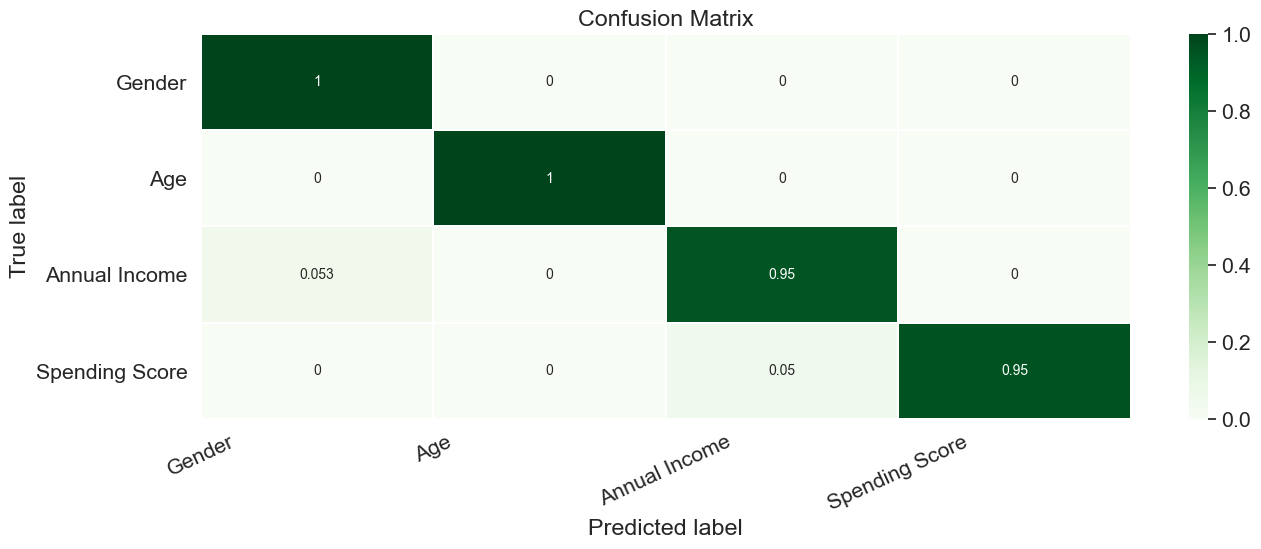

In [162]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (15,5))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Gender', 'Age', 'Annual Income', 'Spending Score']

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### Different Metrics

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        11
           2       0.95      0.95      0.95        19
           3       1.00      0.95      0.97        20

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

